# Dealing with **outliers**
---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/weights_heights.csv')

## Exploring and finding outliers

In [3]:
df.sample(frac=0.01, random_state=10)

,person,weight,height
841,842,70,166
956,957,71,169
544,545,73,170
173,174,70,167
759,760,71,170
955,956,72,170
121,122,74,172
230,231,70,170
11,12,70,169
120,121,66,173


In [4]:
df.describe()

,person,weight,height
count,1000.000000,1000.000000,1000.000000
mean,500.500000,778.674000,203.358000
std,288.819436,22194.963831,755.545953
min,1.000000,0.000000,1.000000
25%,250.750000,68.000000,169.000000
50%,500.500000,70.000000,170.000000
75%,750.250000,72.000000,172.000000
max,1000.000000,701908.000000,17809.000000


### Sorting the __heights__ to observe the outliers

In [5]:
df.sort_values(by='height', ascending=True)

,person,weight,height
739,740,73,1
723,724,67,15
653,654,67,17
682,683,65,163
709,710,68,164
...,...,...,...
214,215,71,176
401,402,68,177
114,115,69,178
436,437,68,16300


### Plotting data

In [6]:
def plot_dataframe(dataframe: pd.DataFrame, plot_dist: bool = True):
    sns.set_theme(style='darkgrid')
    
    sns.relplot(data=dataframe, y='height', x='weight', kind='scatter')
    plt.show()

    sns.lineplot(data=dataframe, y='height', x='weight', estimator=None)
    plt.show()

    sns.lineplot(data=dataframe, y='height', x='weight', estimator='mean')
    plt.show()

    if plot_dist:
        sns.displot(dataframe['height'], kind='hist', kde=True)
        plt.show()

        sns.displot(dataframe['weight'], kind='hist', kde=True)
        plt.show()

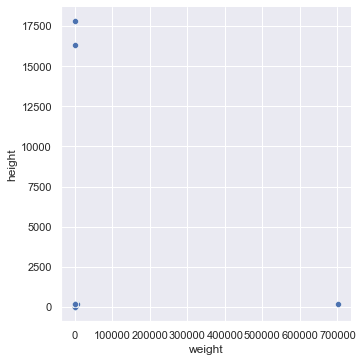

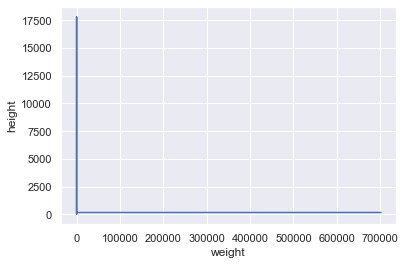

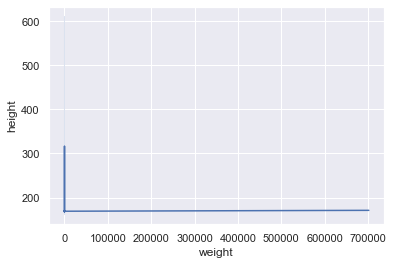

In [7]:
plot_dataframe(df, False)

# It is terrible to visualize and understand the data.. (Because the outliers)
# Later we will see de distribution without the outliers =)

## Quantile/Percentiles

Quantiles and percentile can be a good idea to deal with outliers, but is important to know if your data have a normal distribution... if don't, you can loose importande data.

We have basically two options:
[Remove](#using-quantiles-to-remove-outliers) or [Replace](#using-quantiles-to-replace-outliers)

### Using **Quantiles** to remove outliers

In [8]:
# Getting quantile 0.5 of heights
df['height'].quantile(0.5) # or percentile(50), would be the same (median).

170.0

In [9]:
mean_bf = df['height'].mean()
print('Height mean before cut outliers: ', mean_bf)

# Using quantiles to remove outliers
df_new = df[(df['height'] > df['height'].quantile(0.005)) &
            (df['height'] < df['height'].quantile(0.995))]

mean_af = df_new['height'].mean()
print('Height mean after cut ouliers: ', mean_af)

Height mean before cut outliers:  203.358
Height mean after cut ouliers:  170.05268490374874


In [10]:
# Getting quantile 0.5 of weights
df['weight'].quantile(0.5) # or percentile(50), would be the same (median).

70.0

In [20]:
# Making the same for the weight
mean_bf = df['weight'].mean()
print('Weight mean before cut outliers: ', mean_bf)

# Using quantiles to remove outliers
df_new = df_new[(df_new['weight'] > df_new['weight'].quantile(0.005)) &
            (df_new['weight'] < df_new['weight'].quantile(0.995))]

mean_af = df_new['weight'].mean()
print('Weight mean after cut ouliers: ', mean_af)
print('New shape: ', df_new.shape)


Weight mean before cut outliers:  778.674
Weight mean after cut ouliers:  69.99660835452683
New shape:  (985, 3)


#### Measures before remove outliers :(

In [12]:
df[['weight', 'height']].describe()

,weight,height
count,1000.000000,1000.000000
mean,778.674000,203.358000
std,22194.963831,755.545953
min,0.000000,1.000000
25%,68.000000,169.000000
50%,70.000000,170.000000
75%,72.000000,172.000000
max,701908.000000,17809.000000


#### Measures after remove outliers :)

In [13]:
df_new[['weight', 'height']].describe()

,weight,height
count,973.000000,973.000000
mean,69.983556,170.057554
std,2.741567,2.032852
min,63.000000,165.000000
25%,68.000000,169.000000
50%,70.000000,170.000000
75%,72.000000,172.000000
max,77.000000,175.000000


#### Plotting data

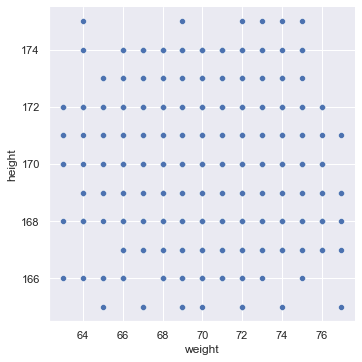

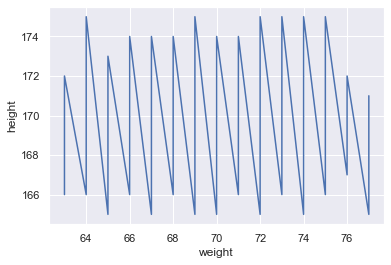

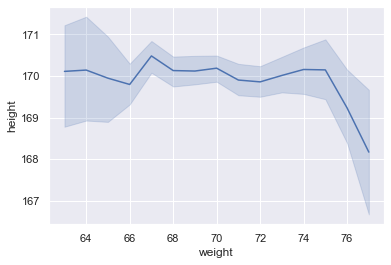

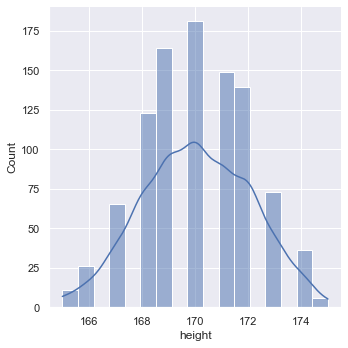

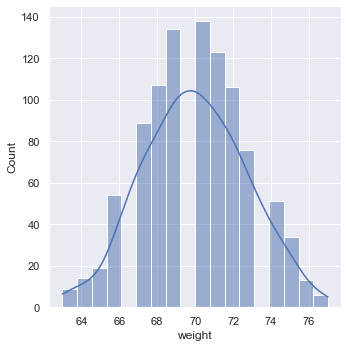

In [14]:
plot_dataframe(df_new)

---

### Using **Quantites** to replace outliers

In [21]:
def replace_outliers_by_mean(s: pd.Series, inplace: bool = False):
    first_qt = s.quantile(0.005)
    last_qt = s.quantile(0.995)

    non_extrem_data = s[(s > first_qt) & (s < last_qt)]
    return s.where((s > first_qt) & (s < last_qt), non_extrem_data.mean(), inplace=inplace) # Obs. We can use 'where' or 'mask'

df_new = df.copy()
df_new['height'] = replace_outliers_by_mean(df_new['height'])
df_new['weight'] = replace_outliers_by_mean(df_new['weight'])


print('New shape: ', df_new.shape)

New shape:  (1000, 3)


#### Measures before replace outliers :(

In [16]:
df[['weight', 'height']].describe()

,weight,height
count,1000.000000,1000.000000
mean,778.674000,203.358000
std,22194.963831,755.545953
min,0.000000,1.000000
25%,68.000000,169.000000
50%,70.000000,170.000000
75%,72.000000,172.000000
max,701908.000000,17809.000000


#### Measures after replace outlier :)

In [17]:
df_new[['weight', 'height']].describe()

,weight,height
count,1000.000000,1000.000000
mean,69.975659,170.052685
std,2.720076,2.009303
min,63.000000,165.000000
25%,68.000000,169.000000
50%,70.000000,170.000000
75%,72.000000,172.000000
max,77.000000,175.000000


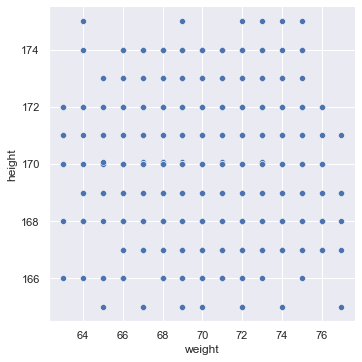

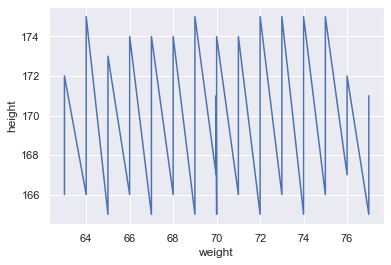

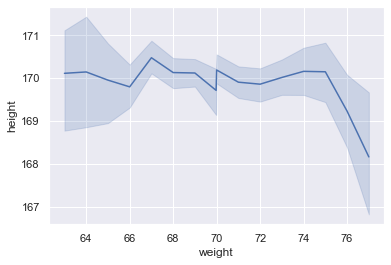

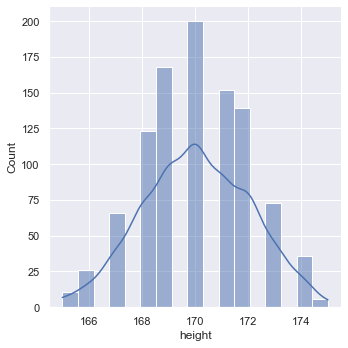

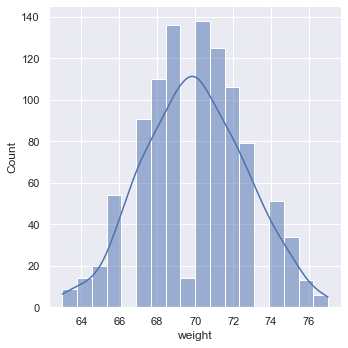

In [18]:
plot_dataframe(df_new)